<a href="https://colab.research.google.com/github/Neilam052119/WTI-CrudeOilPrice-Forecasting/blob/main/Capstone_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### READ DATA

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE1-WTI/EIA-PET_RWTC_D.csv')


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE1-WTI/EIA-PET_RWTC_D.csv')

### IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
df.head()

Date  Value
0  2022-02-08  89.32
1  2022-02-07  91.25
2  2022-02-04  92.27
3  2022-02-03  90.17
4  2022-02-02  88.16

In [ ]:
df.shape

(9124, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9124 non-null   object 
 1   Value   9124 non-null   float64
dtypes: float64(1), object(1)
memory usage: 142.7+ KB


## **MAKING** ***DATA*** **COPY**

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

Date  Value
0  2022-02-08  89.32
1  2022-02-07  91.25
2  2022-02-04  92.27
3  2022-02-03  90.17
4  2022-02-02  88.16

In [ ]:
data.head()

Date  Value
0  2022-02-08  89.32
1  2022-02-07  91.25
2  2022-02-04  92.27
3  2022-02-03  90.17
4  2022-02-02  88.16

## DATA PREPROCESSING

In [ ]:
df1.dtypes

Date      object
Value    float64
dtype: object

In [ ]:
df1.isnull().sum()

Date     0
Value    0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.index.duplicated().sum()

0

In [ ]:
df1.columns

Index(['Date', 'Value'], dtype='object')

In [ ]:
# change columns to ds and y
df1.columns = ["ds" , "y"]

In [ ]:
df1.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
#change ds column to datetimeindex
df1['ds'] = pd.DatetimeIndex(df1['ds'])
df1.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Text(0.5, 0, 'Date')

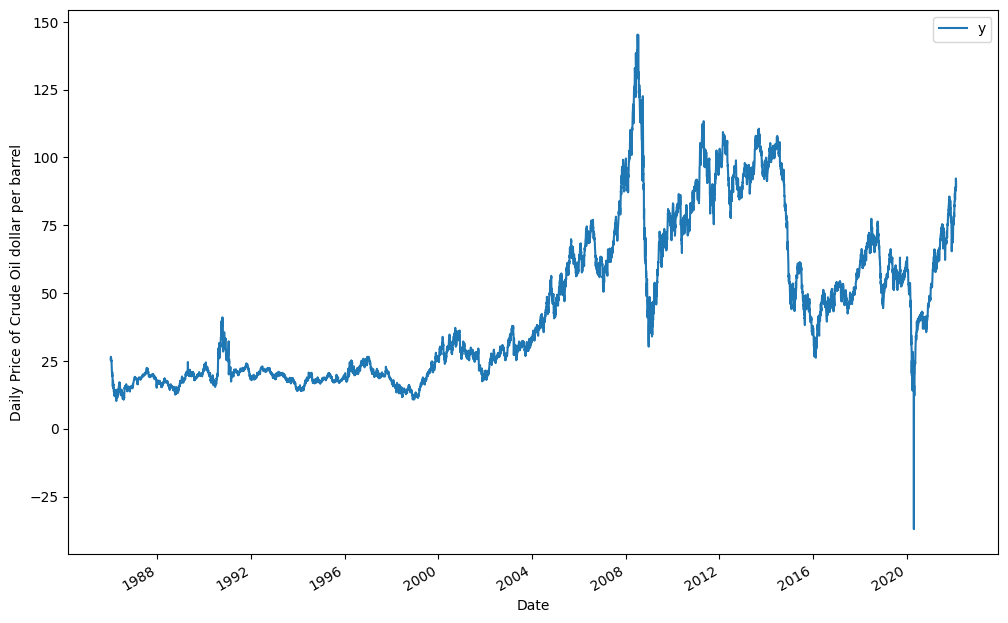

In [ ]:
P = df1.set_index('ds').plot(figsize=(12, 8))
P.set_ylabel('Daily Price of Crude Oil dollar per barrel')
P.set_xlabel('Date')

We can see two key events in the time series
1)
2)

## APPLYING PROPHET MODEL ON WHOLE DATA

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet(interval_width=1)
m.fit(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/i8v_1i6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/zgwcxoqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64683', 'data', 'file=/tmp/tmp_o2l62qz/i8v_1i6i.json', 'init=/tmp/tmp_o2l62qz/zgwcxoqx.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_model86k6l2pe/prophet_model-20230926071439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = m.make_future_dataframe(periods=366, freq='D')
future_dates.head()

ds
0 1986-01-02
1 1986-01-03
2 1986-01-06
3 1986-01-07
4 1986-01-08

In [ ]:
future_dates.tail()

ds
9485 2023-02-05
9486 2023-02-06
9487 2023-02-07
9488 2023-02-08
9489 2023-02-09

In [ ]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 1986-01-02  13.785981  -20.396449   41.954125
1 1986-01-03  13.827388  -18.648833   50.634345
2 1986-01-06  14.017906  -24.671691   44.179775
3 1986-01-07  14.055346  -17.150843   42.519641
4 1986-01-08  14.093868  -20.313808   47.013161

In [ ]:

from prophet.plot import plot_plotly
plot_plotly(m , forecast)

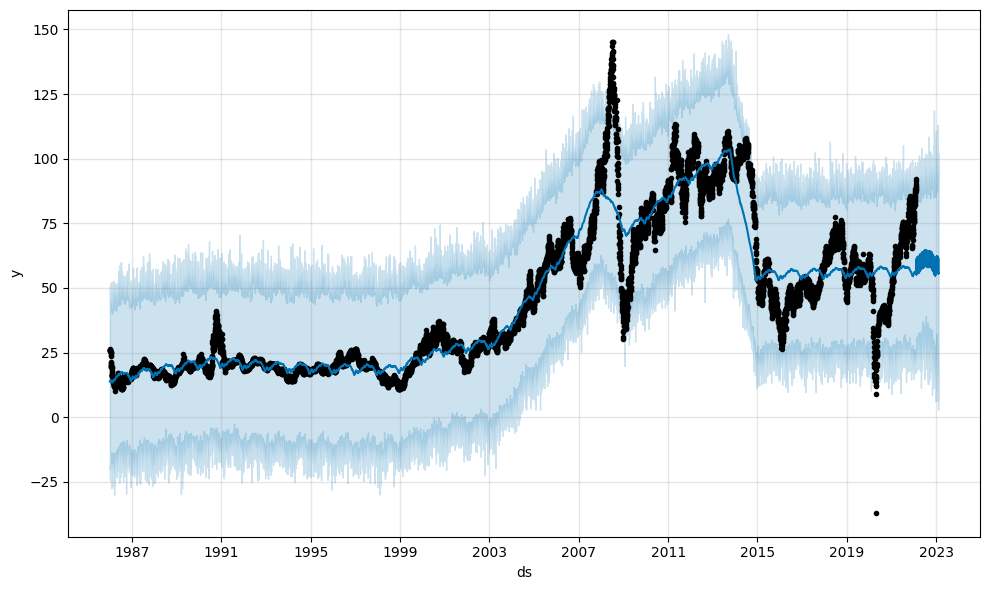

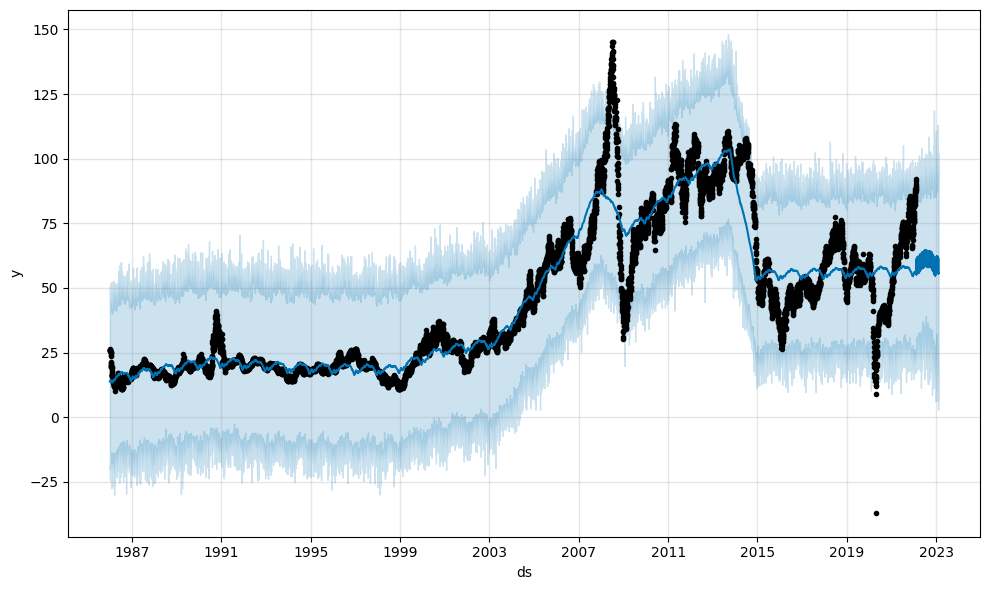

In [ ]:
m.plot(forecast, uncertainty=True)

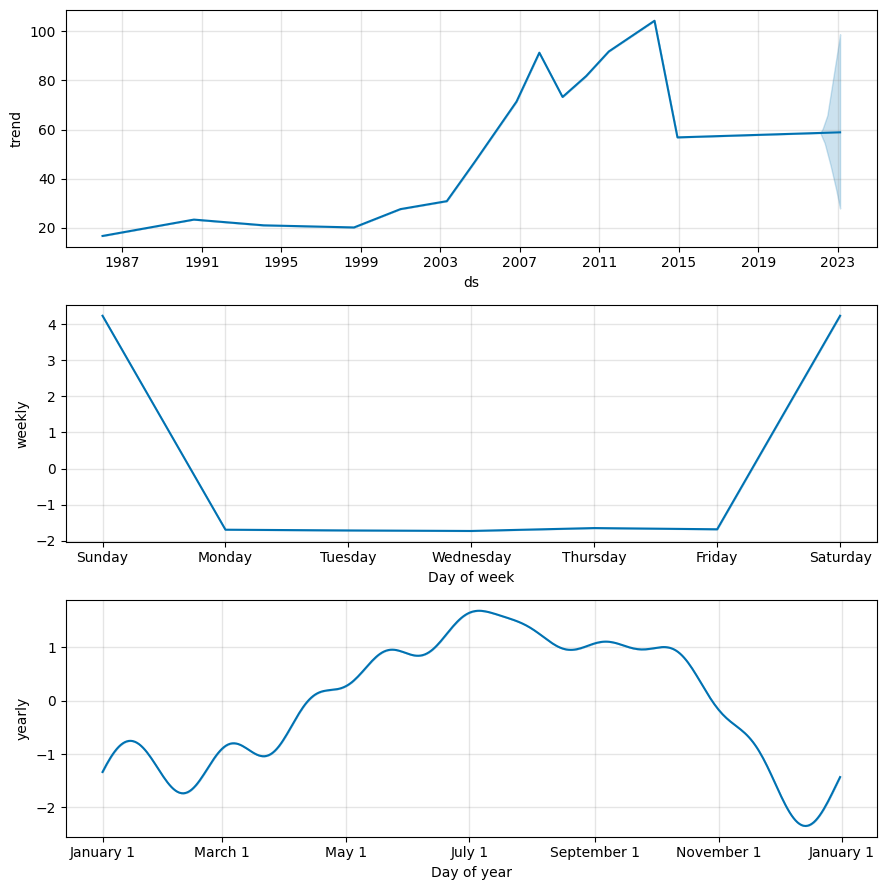

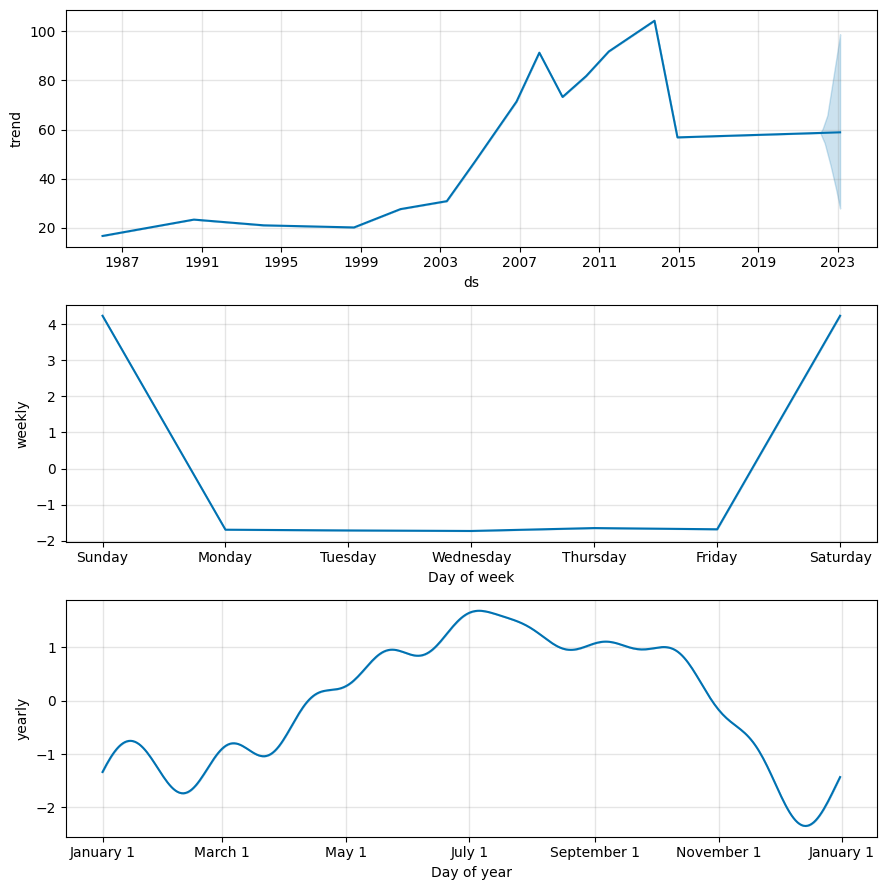

In [ ]:
m.plot_components(forecast)

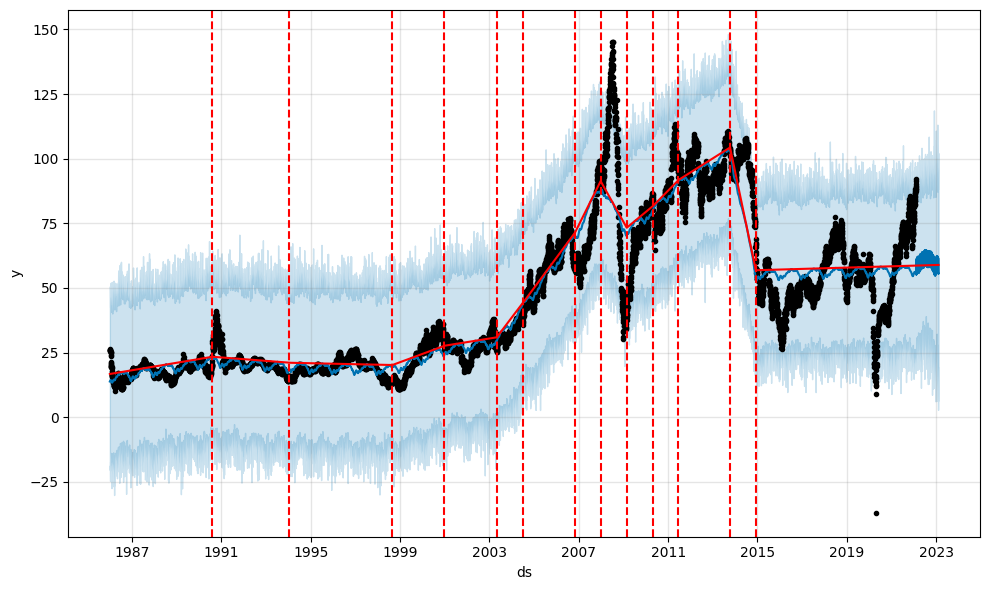

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m.changepoints

292    1987-03-03
584    1988-04-25
876    1989-06-13
1168   1990-08-01
1460   1991-09-20
1752   1992-11-09
2043   1994-01-07
2335   1995-03-07
2627   1996-05-02
2919   1997-06-27
3211   1998-08-26
3503   1999-10-25
3795   2000-12-22
4087   2002-02-26
4379   2003-04-28
4671   2004-06-29
4963   2005-08-26
5255   2006-10-26
5546   2007-12-24
5838   2009-02-23
6130   2010-04-21
6422   2011-06-16
6714   2012-08-13
7006   2013-10-09
7298   2014-12-05
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/0aivid8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/wd14840x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34398', 'data', 'file=/tmp/tmp_o2l62qz/0aivid8k.json', 'init=/tmp/tmp_o2l62qz/wd14840x.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_modelg43z_evl/prophet_model-20230926071453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


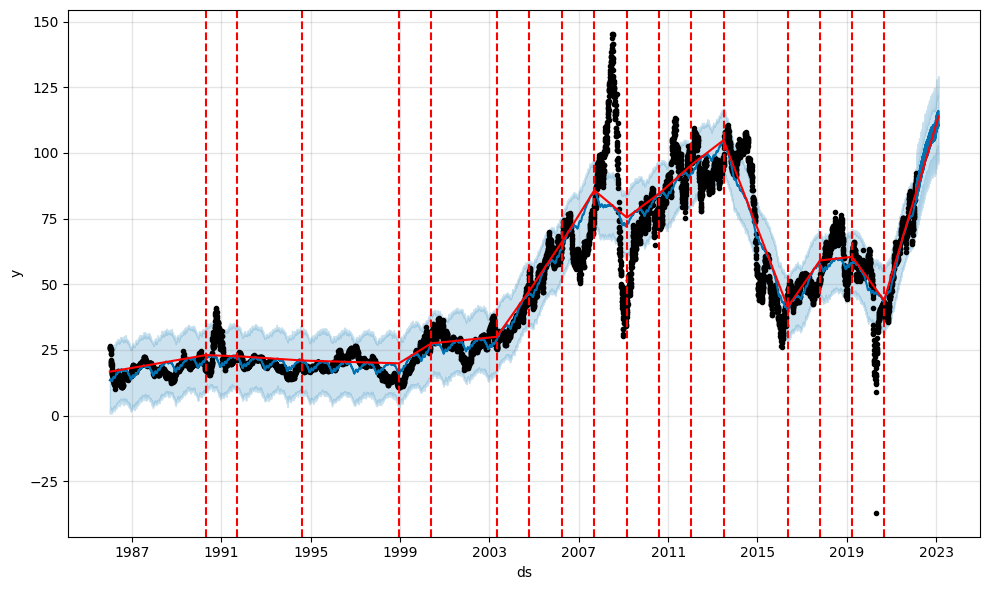

In [ ]:
pro_change= Prophet(changepoint_range=1)
forecast = pro_change.fit(df1).predict(future_dates)

fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

### APPLYING PROPHET MODEL ON TRAIN AND TEST SPLIT BEFORE 2020 CORONA PANDEMIC

In [ ]:
from prophet import Prophet

In [ ]:
# split data
train = df1[df1['ds'] < pd.Timestamp('2019-01-01')]
test = df1[df1['ds'] >= pd.Timestamp('2019-01-01')]

In [ ]:
print(f"Number of months in train data: {len(train)}")
print(f"Number of months in test data: {len(test)}")


Number of months in train data: 8331
Number of months in test data: 793


In [ ]:
m1 = Prophet()
m1.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/kl8bf_hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/p2r1k9be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46055', 'data', 'file=/tmp/tmp_o2l62qz/kl8bf_hd.json', 'init=/tmp/tmp_o2l62qz/p2r1k9be.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_model9vbnmy4d/prophet_model-20230926071500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# future dataframe - placeholder object
future = m1.make_future_dataframe(periods=90, freq='MS')
future.head()

ds
0 1986-01-02
1 1986-01-03
2 1986-01-06
3 1986-01-07
4 1986-01-08

In [ ]:
future.tail()

ds
8416 2026-02-01
8417 2026-03-01
8418 2026-04-01
8419 2026-05-01
8420 2026-06-01

In [ ]:
forecast = m1.predict(future)

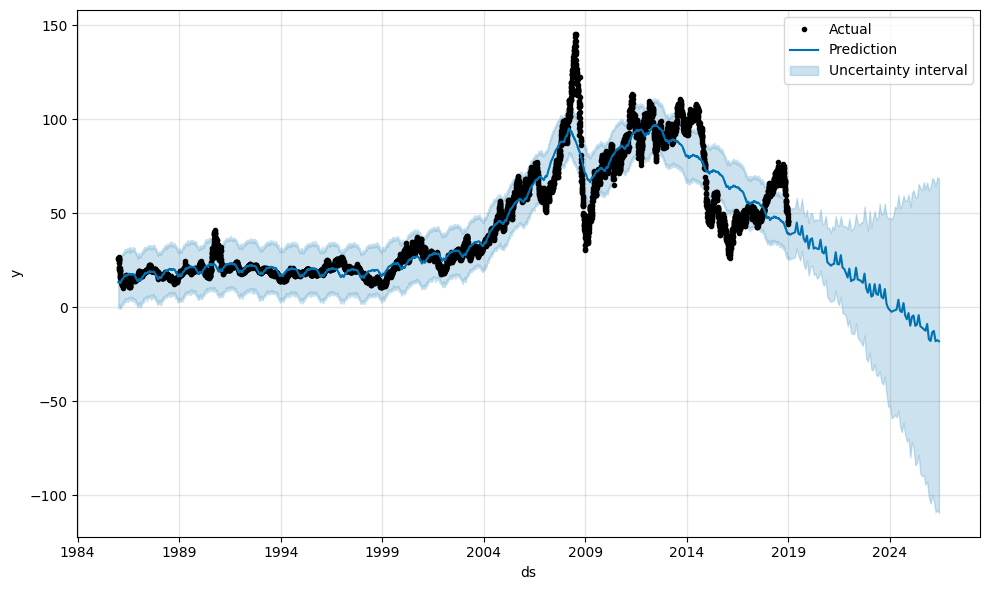

In [ ]:

# Plot Forecast Future values
fig = m1.plot(forecast)
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

In [ ]:
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1986-01-02  16.973806    0.475174   27.203630    16.973806    16.973806   
1 1986-01-03  16.977280   -0.572904   26.054770    16.977280    16.977280   
2 1986-01-06  16.987700    0.473512   27.674480    16.987700    16.987700   
3 1986-01-07  16.991173    1.595290   27.313225    16.991173    16.991173   
4 1986-01-08  16.994646    1.201169   26.079050    16.994646    16.994646   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -3.690741             -3.690741             -3.690741 -1.576496   
1       -3.687281             -3.687281             -3.687281 -1.623645   
2       -3.554840             -3.554840             -3.554840 -1.625762   
3       -3.554368             -3.554368             -3.554368 -1.662201   
4       -3.525512             -3.525512             -3.525512 -1.665347   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -1.576496     -1.576496 -2.114245     -2.114245     -2.114245   
1     -1.623645     -1.623645 -2.063637     -2.063637     -2.063637   
2     -1.625762     -1.625762 -1.929079     -1.929079     -1.929079   
3     -1.662201     -1.662201 -1.892167     -1.892167     -1.892167   
4     -1.665347     -1.665347 -1.860165     -1.860165     -1.860165   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  13.283065  
1                         0.0  13.289998  
2                         0.0  13.432859  
3                         0.0  13.436805  
4                         0.0  13.469134

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 1986-01-02  13.283065    0.475174   27.203630
1 1986-01-03  13.289998   -0.572904   26.054770
2 1986-01-06  13.432859    0.473512   27.674480
3 1986-01-07  13.436805    1.595290   27.313225
4 1986-01-08  13.469134    1.201169   26.079050

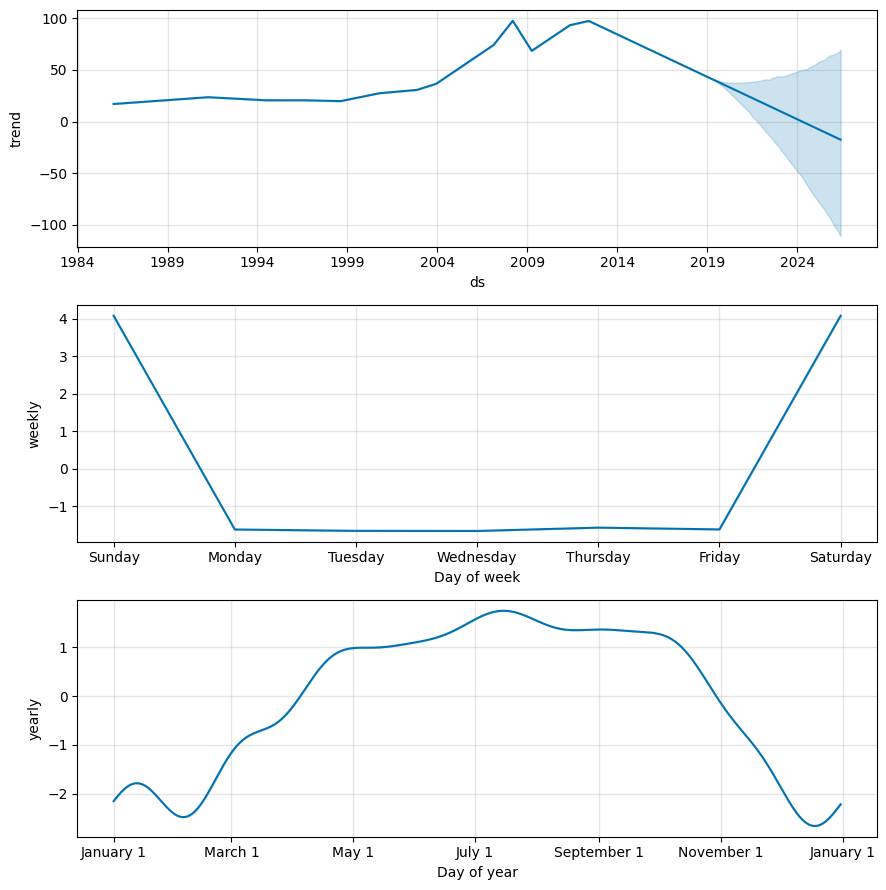

In [ ]:
# plot components
fig = m1.plot_components(forecast)



In [ ]:
from prophet.plot import plot_plotly
plot_plotly(m1 , forecast)

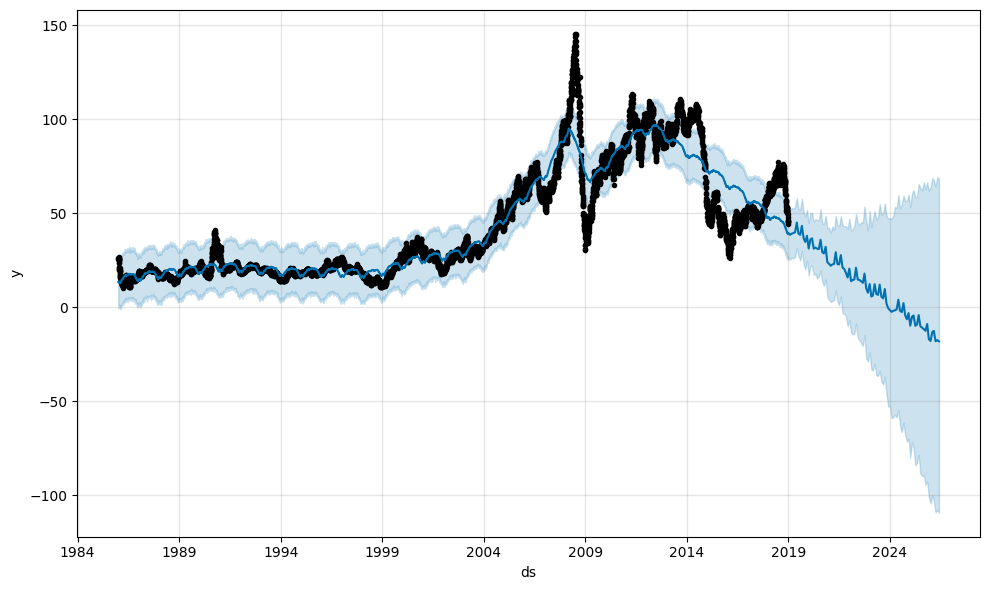

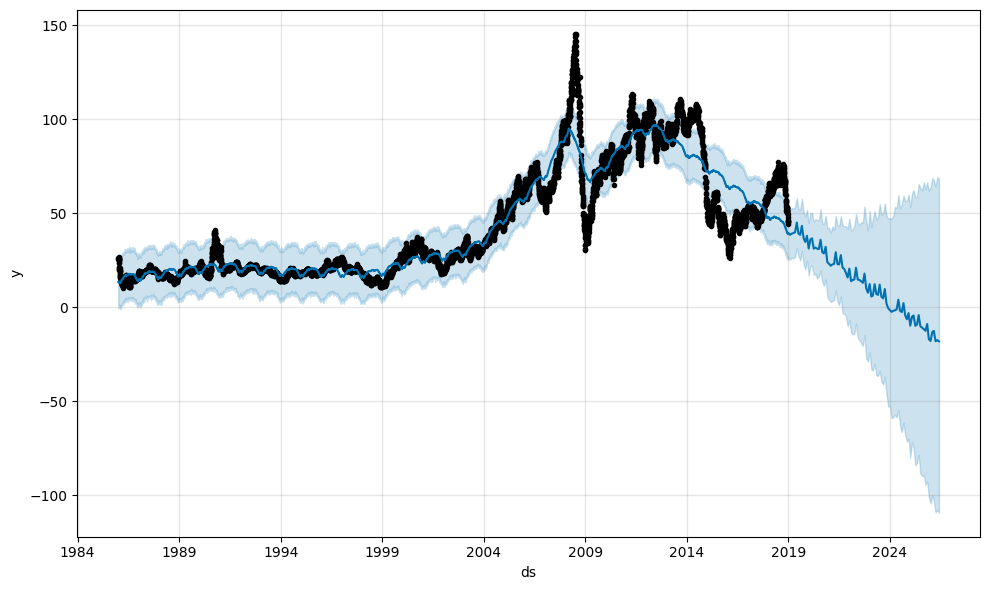

In [ ]:
m1.plot(forecast, uncertainty=True)

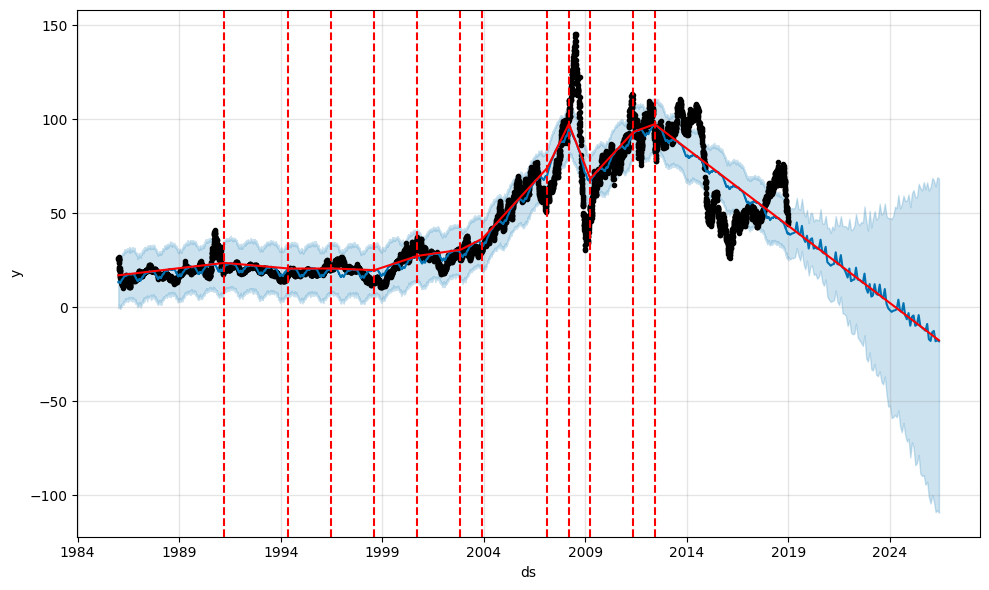

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m1.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m1, forecast)

In [ ]:
m1.changepoints

267    1987-01-26
533    1988-02-11
800    1989-02-24
1066   1990-03-08
1333   1991-03-22
1599   1992-04-06
1866   1993-04-26
2132   1994-05-16
2399   1995-06-07
2665   1996-06-26
2932   1997-07-17
3198   1998-08-07
3465   1999-08-31
3731   2000-09-22
3998   2001-10-15
4264   2002-11-07
4531   2003-12-03
4797   2004-12-29
5064   2006-01-24
5330   2007-02-15
5597   2008-03-10
5863   2009-03-30
6130   2010-04-21
6396   2011-05-10
6663   2012-05-31
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/857bnvrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/n7oovxha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51440', 'data', 'file=/tmp/tmp_o2l62qz/857bnvrv.json', 'init=/tmp/tmp_o2l62qz/n7oovxha.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_modelypk5g_1q/prophet_model-20230926071512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


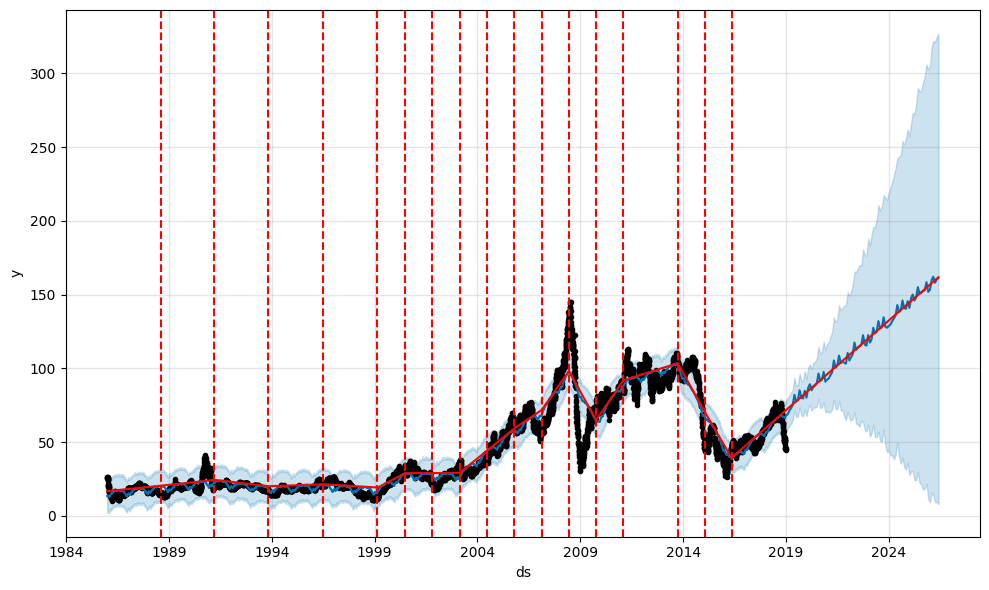

In [ ]:
pro_change= Prophet(changepoint_range=1)
forecast = pro_change.fit(train).predict(future)

fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## EVALUATE MODEL
### Evaluate the model on one test set

In [ ]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(predictions)
print(actuals)
print(f"RMSE: {round(rmse(predictions, actuals))}")

7628     40.773534
7629     40.620703
7630     40.546845
7631     40.499477
7632     40.563115
           ...    
8416    159.945058
8417    162.171429
8418    158.060178
8419    160.216507
8420    161.259908
Name: yhat, Length: 793, dtype: float64
0      89.32
1      91.25
2      92.27
3      90.17
4      88.16
       ...  
788    49.58
789    48.27
790    47.76
791    46.92
792    46.31
Name: y, Length: 793, dtype: float64
RMSE: 31


In [ ]:
import plotly.graph_objects as go

# Create a trace for the actual data
actual_trace = go.Scatter(
    x = actuals.index,
    y = actuals,
    mode = 'lines',
    name = 'Actual'
)

# Create a trace for the predicted data
predicted_trace = go.Scatter(
    x = predictions.index,
    y = predictions,
    mode = 'lines',
    name = 'Predicted'
)

# Create the layout
layout = go.Layout(
    title = 'Actual vs Predicted',
    xaxis = {'title': 'Date'},
    yaxis = {'title': 'Value'}
)

# Create the figure and add traces
fig = go.Figure(layout=layout)
fig.add_trace(actual_trace)
fig.add_trace(predicted_trace)

# Show the figure
fig.show()


In [ ]:
from prophet.diagnostics import cross_validation

# test period
horizon = '365 days'

# itraining period (optional. default is 3x of horizon)
initial = str(365 * 5) + ' days'

# spacing between cutoff dates (optional. default is 0.5x of horizon)
period = '365 days'

df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon, parallel='processes')

INFO:prophet:Making 31 forecasts with cutoffs between 1991-02-16 00:00:00 and 2021-02-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bd7140a5390>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/odt3mkv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/pq45fykt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/7nwa_hos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1712', 'data', 'file=/tmp/tmp_o2l62qz/odt3mkv1.json', 'init=/tmp/tmp_o2l62qz/7nwa_hos.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_modelszssdvuc/prophet_model-20230926071522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/qx5eiyt7.json
DEB

In [ ]:
# predicted output using cross validation
df_cv

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0    1991-02-18  28.431945   20.090031   38.237876  20.73 1991-02-16
1    1991-02-19  28.456332   20.045708   36.979471  20.08 1991-02-16
2    1991-02-20  28.490266   19.197405   37.043637  20.18 1991-02-16
3    1991-02-21  28.602209   20.522867   36.982176  18.48 1991-02-16
4    1991-02-22  28.605195   19.697029   36.123804  17.43 1991-02-16
...         ...        ...         ...         ...    ...        ...
7810 2022-02-02  31.287320   -7.107219   69.017626  88.16 2021-02-08
7811 2022-02-03  31.320311   -4.524224   68.225587  90.17 2021-02-08
7812 2022-02-04  31.218876   -4.158507   69.151525  92.27 2021-02-08
7813 2022-02-07  31.158617    0.165595   66.511112  91.25 2021-02-08
7814 2022-02-08  31.100883  -12.418374   71.406025  89.32 2021-02-08

[7815 rows x 6 columns]

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

# performance metrics
df_metrics = performance_metrics(df_cv)  # can define window size, e.g. rolling_window=365
df_metrics

horizon         mse       rmse        mae      mape     mdape     smape  \
0    37 days  334.654484  18.293564  12.125656  0.284494  0.194227  0.255532   
1    38 days  331.151230  18.197561  12.089900  0.283380  0.195492  0.255720   
2    39 days  327.377655  18.093580  12.029898  0.282405  0.195492  0.255694   
3    40 days  330.922214  18.191268  12.108493  0.285473  0.197352  0.257690   
4    41 days  339.083160  18.414211  12.272682  0.288262  0.197505  0.259479   
..       ...         ...        ...        ...       ...       ...       ...   
324 361 days  612.643150  24.751629  18.038091  0.470699  0.350095  0.417430   
325 362 days  604.545502  24.587507  17.906756  0.466721  0.349733  0.415307   
326 363 days  613.484555  24.768620  18.027054  0.470807  0.354238  0.416560   
327 364 days  626.745786  25.034891  18.205276  0.474353  0.356555  0.418666   
328 365 days  634.490313  25.189091  18.293713  0.476652  0.357910  0.420570   

     coverage  
0    0.773002  
1    0.773600  
2    0.774831  
3    0.774136  
4    0.772941  
..        ...  
324  0.694454  
325  0.700567  
326  0.699936  
327  0.695080  
328  0.692702  

[329 rows x 8 columns]

### APPLYING PROPHET MODEL ON TRAIN AND TEST DATA AFTER DEC/2020 CORONA PANDEMIC

In [ ]:
data.head()

Date  Value
0  2022-02-08  89.32
1  2022-02-07  91.25
2  2022-02-04  92.27
3  2022-02-03  90.17
4  2022-02-02  88.16

In [ ]:
data.columns = ["ds" , "y"]

In [ ]:
data.dtypes

ds     object
y     float64
dtype: object

In [ ]:
data['ds'] = pd.DatetimeIndex(data['ds'])
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
# split data
train_c= data[data['ds'] < pd.Timestamp('2021-01-01')]
test_c = data[data['ds'] >= pd.Timestamp('2021-01-01')]

In [ ]:
print(f"Number of months in train data: {len(train_c)}")
print(f"Number of months in test data: {len(test_c)}")

Number of months in train data: 8842
Number of months in test data: 282


In [ ]:
m_c = Prophet()
m_c.fit(train_c)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/evob47ip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/qpybywle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52149', 'data', 'file=/tmp/tmp_o2l62qz/evob47ip.json', 'init=/tmp/tmp_o2l62qz/qpybywle.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_model33suq06d/prophet_model-20230926071648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# future dataframe - placeholder object
future_c = m_c.make_future_dataframe(periods=90, freq='MS')
future_c.head()

ds
0 1986-01-02
1 1986-01-03
2 1986-01-06
3 1986-01-07
4 1986-01-08

In [ ]:
future_c.tail()



ds
8927 2028-02-01
8928 2028-03-01
8929 2028-04-01
8930 2028-05-01
8931 2028-06-01

In [ ]:
forecast_c = m_c.predict(future_c)

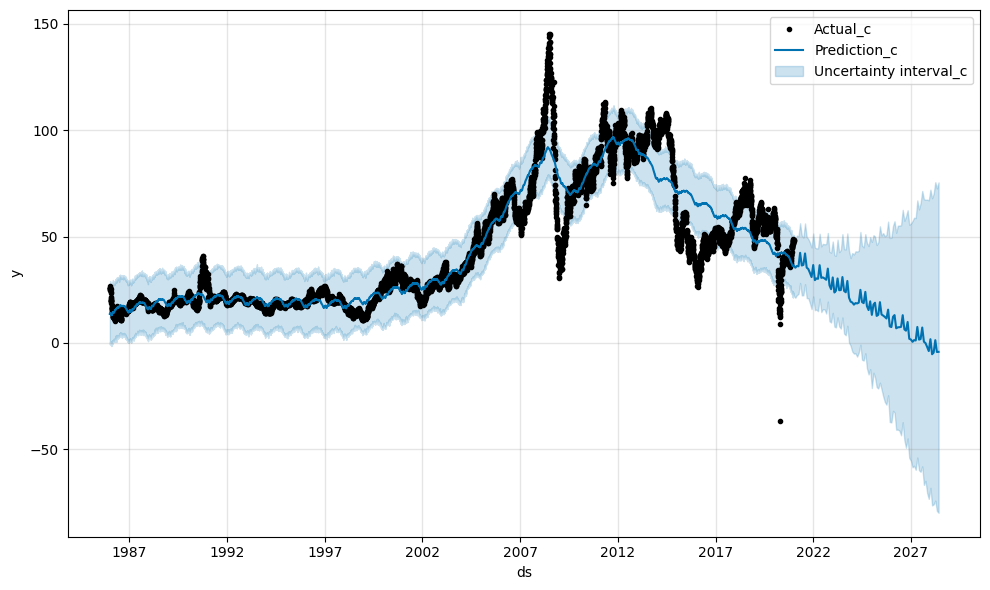

In [ ]:

# Plot Forecast Future values
fig_c = m_c.plot(forecast_c)
plt.legend(['Actual_c', 'Prediction_c', 'Uncertainty interval_c'])
plt.show()

In [ ]:
forecast_c.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1986-01-02  16.745670    0.467034   27.172254    16.745670    16.745670   
1 1986-01-03  16.749701   -0.761171   27.899416    16.749701    16.749701   
2 1986-01-06  16.761795    0.470112   27.996154    16.761795    16.761795   
3 1986-01-07  16.765826   -0.072063   26.238163    16.765826    16.765826   
4 1986-01-08  16.769858    0.688702   29.016845    16.769858    16.769858   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -3.126097             -3.126097             -3.126097 -1.658429   
1       -3.144176             -3.144176             -3.144176 -1.718185   
2       -3.019766             -3.019766             -3.019766 -1.695484   
3       -3.034807             -3.034807             -3.034807 -1.734862   
4       -3.019367             -3.019367             -3.019367 -1.738216   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -1.658429     -1.658429 -1.467668     -1.467668     -1.467668   
1     -1.718185     -1.718185 -1.425991     -1.425991     -1.425991   
2     -1.695484     -1.695484 -1.324282     -1.324282     -1.324282   
3     -1.734862     -1.734862 -1.299946     -1.299946     -1.299946   
4     -1.738216     -1.738216 -1.281151     -1.281151     -1.281151   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  13.619573  
1                         0.0  13.605525  
2                         0.0  13.742029  
3                         0.0  13.731019  
4                         0.0  13.750491

In [ ]:
forecast_c[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 1986-01-02  13.619573    0.467034   27.172254
1 1986-01-03  13.605525   -0.761171   27.899416
2 1986-01-06  13.742029    0.470112   27.996154
3 1986-01-07  13.731019   -0.072063   26.238163
4 1986-01-08  13.750491    0.688702   29.016845

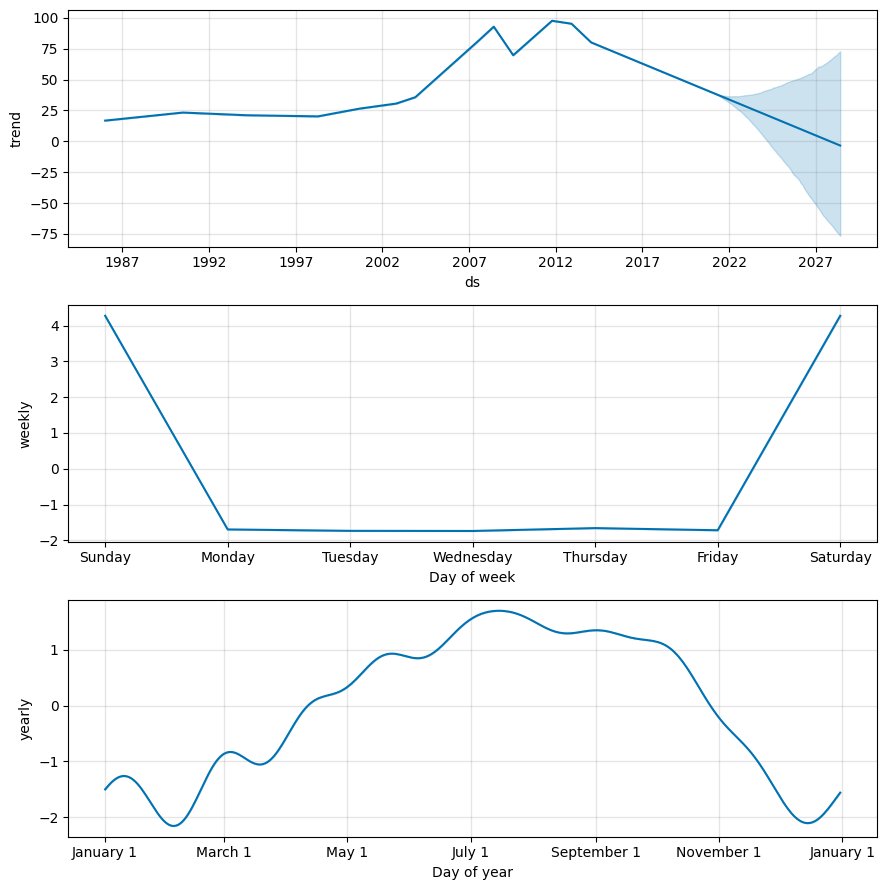

In [ ]:
# plot components
fig_c = m_c.plot_components(forecast_c)



In [ ]:
from prophet.plot import plot_plotly
plot_plotly(m_c , forecast_c)

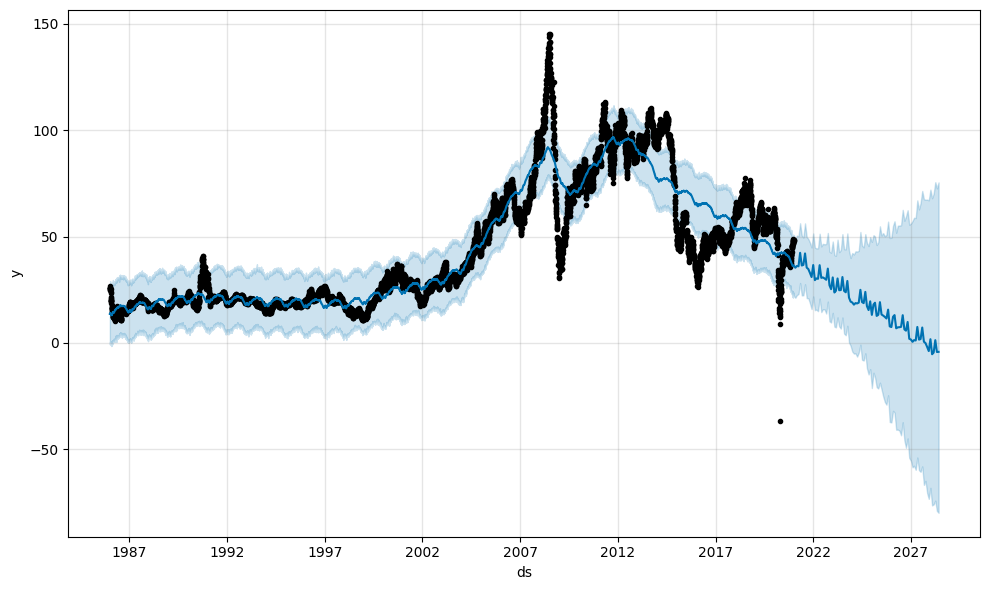

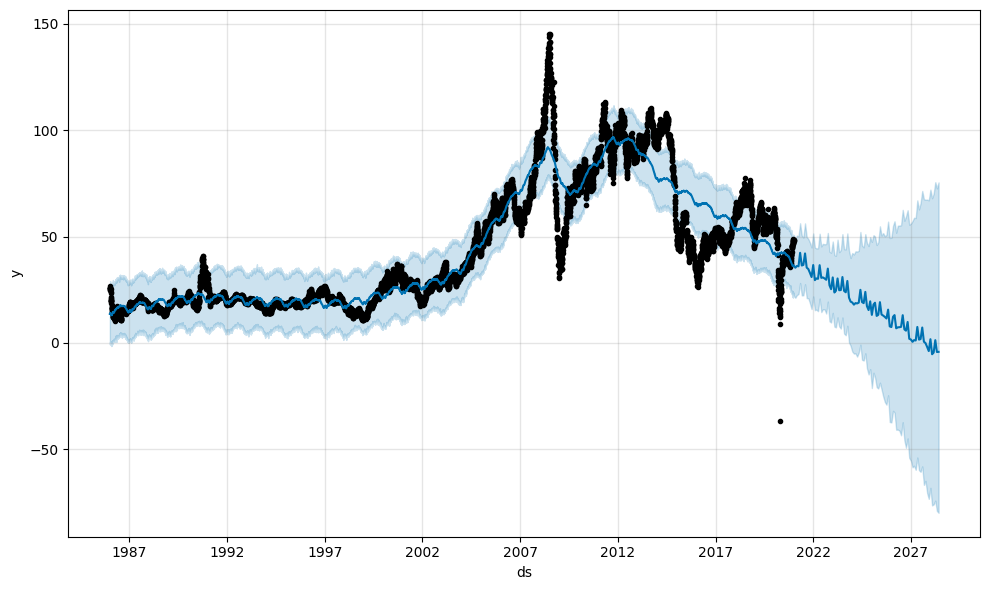

In [ ]:

m_c.plot(forecast_c, uncertainty=True)


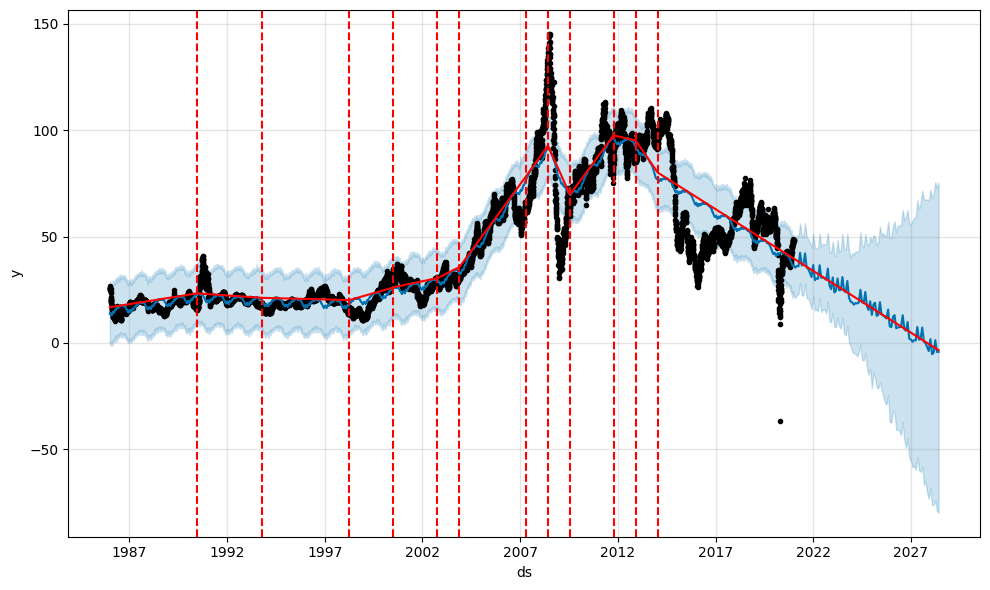

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig_c = m_c.plot(forecast_c)
a_c = add_changepoints_to_plot(fig_c.gca(), m_c, forecast_c)

In [ ]:
m_c.changepoints

283    1987-02-18
566    1988-03-29
849    1989-05-05
1132   1990-06-12
1414   1991-07-17
1697   1992-08-24
1980   1993-10-07
2263   1994-11-18
2546   1996-01-08
2829   1997-02-19
3112   1998-04-06
3395   1999-05-21
3677   2000-07-07
3960   2001-08-21
4243   2002-10-09
4526   2003-11-24
4809   2005-01-18
5092   2006-03-06
5375   2007-04-23
5658   2008-06-05
5940   2009-07-20
6223   2010-09-01
6506   2011-10-14
6789   2012-11-28
7072   2014-01-14
Name: ds, dtype: datetime64[ns]

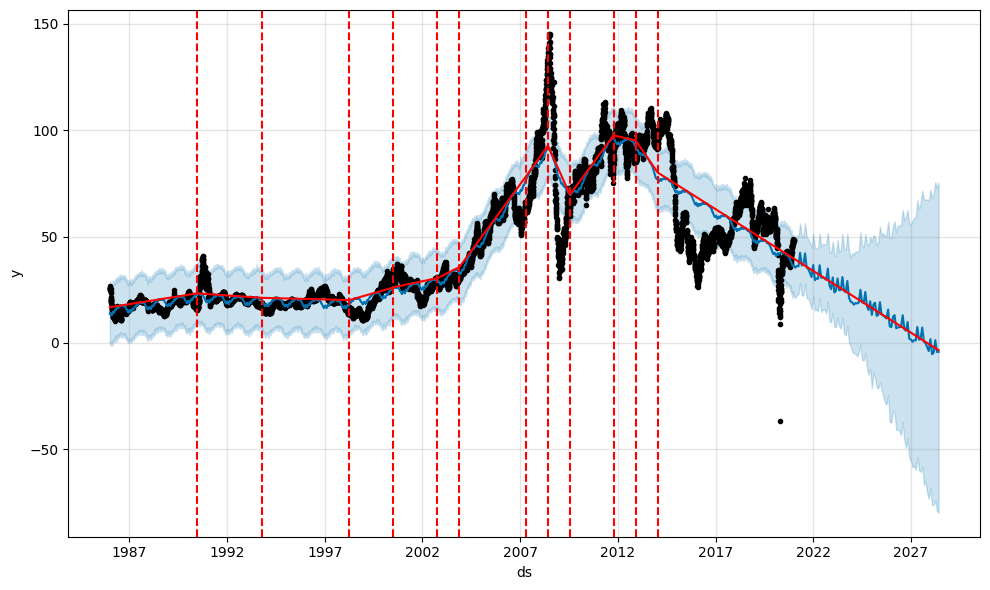

In [ ]:
pro_changec= Prophet(changepoint_range=1)
# forecast = pro_change.fit(train_c).predict(future_c)

fig_c = m_c.plot(forecast_c)
a_c = add_changepoints_to_plot(fig_c.gca(), m_c, forecast_c)

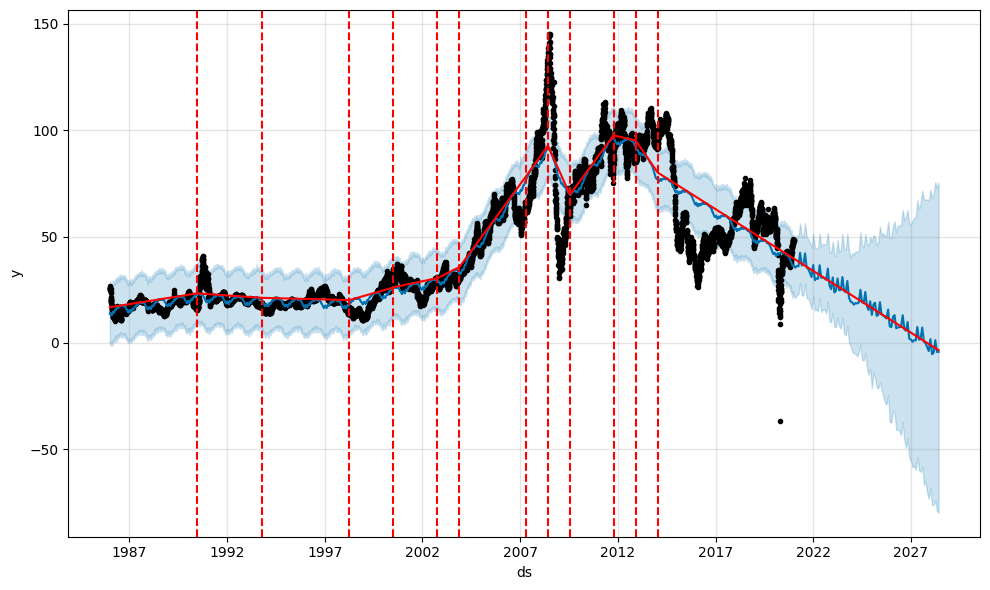

In [ ]:
pro_changec= Prophet(changepoint_range=0.2)
# forecast = pro_change.fit(train_c).predict(future_c)

fig_c = m_c.plot(forecast_c)
a_c = add_changepoints_to_plot(fig_c.gca(), m_c, forecast_c)

In [ ]:
from statsmodels.tools.eval_measures import rmse

predictions_c = forecast.iloc[-len(test):]['yhat']
actuals_c = test['y']

print(predictions_c)
print(actuals_c)
print(f"RMSE: {round(rmse(predictions_c, actuals_c))}")

7628     40.773534
7629     40.620703
7630     40.546845
7631     40.499477
7632     40.563115
           ...    
8416    159.945058
8417    162.171429
8418    158.060178
8419    160.216507
8420    161.259908
Name: yhat, Length: 793, dtype: float64
0      89.32
1      91.25
2      92.27
3      90.17
4      88.16
       ...  
788    49.58
789    48.27
790    47.76
791    46.92
792    46.31
Name: y, Length: 793, dtype: float64
RMSE: 31


In [ ]:
from prophet.diagnostics import cross_validation
horizon = '365 days'
initial = str(365 * 5) + ' days'
period = '365 days'

data_cv = cross_validation(m_c, initial=initial, period=period, horizon=horizon, parallel='processes')

INFO:prophet:Making 30 forecasts with cutoffs between 1991-01-08 00:00:00 and 2020-01-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7bd7148e3880>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/ae4ivajf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/w8oju681.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/dhsvosa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13920', 'data', 'file=/tmp/tmp_o2l62qz/ae4ivajf.json', 'init=/tmp/tmp_o2l62qz/dhsvosa2.json', 'output', 'file=/tmp/tmp_o2l62qz/prophet_modelx8bl5r58/prophet_model-20230926071701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:01 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_o2l62qz/at70z73a.json
INFO:cmdstanpy:Chain [1] start processing
DE

In [ ]:
# predicted output using cross validation
data_cv

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0    1991-01-09  33.077227   30.113894   35.913361  28.00 1991-01-08
1    1991-01-10  33.311016   30.156710   36.395523  27.55 1991-01-08
2    1991-01-11  33.407515   30.343855   36.460436  27.43 1991-01-08
3    1991-01-14  33.535200   30.635758   36.678118  30.13 1991-01-08
4    1991-01-15  33.565754   30.520680   36.801351  30.35 1991-01-08
...         ...        ...         ...         ...    ...        ...
7556 2020-12-24  33.537746   17.611502   48.502001  48.18 2020-01-01
7557 2020-12-28  33.595917   18.998200   47.644176  47.50 2020-01-01
7558 2020-12-29  33.538685   19.936912   48.624146  47.85 2020-01-01
7559 2020-12-30  33.562828   20.339223   47.686862  48.24 2020-01-01
7560 2020-12-31  33.649505   18.477599   47.854012  48.35 2020-01-01

[7561 rows x 6 columns]

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

# performance metrics
data_metrics = performance_metrics(data_cv)  # can define window size, e.g. rolling_window=365
data_metrics

horizon         mse       rmse        mae      mape     mdape     smape  \
0    37 days  351.241004  18.741425  11.515863  0.287816  0.132291  0.238152   
1    38 days  359.148098  18.951203  11.663235  0.292416  0.135004  0.240827   
2    39 days  364.703679  19.097217  11.753402  0.295482  0.134279  0.242671   
3    40 days  367.533700  19.171168  11.783718  0.297474  0.133287  0.243550   
4    41 days  368.334257  19.192036  11.814115  0.298655  0.135562  0.244412   
..       ...         ...        ...        ...       ...       ...       ...   
324 361 days  485.057222  22.024015  16.257698  0.441640  0.323944  0.387838   
325 362 days  495.345411  22.256357  16.380858  0.444779  0.326564  0.389004   
326 363 days  500.929331  22.381451  16.437560  0.448431  0.326325  0.390651   
327 364 days  501.976111  22.404823  16.469099  0.451580  0.327791  0.393619   
328 365 days  495.089396  22.250604  16.369330  0.450519  0.328433  0.393327   

     coverage  
0    0.473986  
1    0.470899  
2    0.470648  
3    0.473545  
4    0.474553  
..        ...  
324  0.322125  
325  0.325838  
326  0.326455  
327  0.322243  
328  0.322678  

[329 rows x 8 columns]